# Use OSMnx to construct place boundaries and street networks, and save as various file formats for working with later

Author: [Geoff Boeing](https://geoffboeing.com/)

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)
  - [Journal article/citation](http://geoffboeing.com/publications/osmnx-complex-street-networks/)

In [1]:
import osmnx as ox
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.11'

In [2]:
place = 'Piedmont, California, USA'

## Get place shape geometries from OSM and save as shapefile

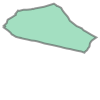

In [3]:
gdf = ox.gdf_from_place(place)
gdf.loc[0, 'geometry']

In [4]:
# save place boundary geometry as ESRI shapefile
ox.save_gdf_shapefile(gdf, filename='place-shape')

## Construct street network and save as shapefile to work with in GIS

In [5]:
G = ox.graph_from_place(place, network_type='drive')
G_projected = ox.project_graph(G)

In [6]:
# save street network as ESRI shapefile
ox.save_graph_shapefile(G_projected, filename='network-shape')

## Save street network as GraphML to work with in Gephi or NetworkX

In [7]:
# save street network as GraphML file
ox.save_graphml(G_projected, filename='network.graphml')

## Save street network as SVG to work with in Illustrator

In [8]:
# save street network as SVG
fig, ax = ox.plot_graph(G_projected, show=False, save=True, 
                           filename='network', file_format='svg')

## Load street network from saved GraphML file

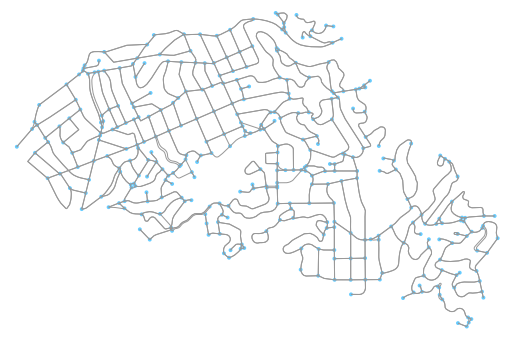

In [9]:
G2 = ox.load_graphml('network.graphml')
fig, ax = ox.plot_graph(G2)

## Save building footprints as a shapefile

In [10]:
gdf = ox.footprints_from_place(place='Piedmont, California, USA')
gdf.drop(labels='nodes', axis=1).to_file('data/piedmont_bldgs')